In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import random 
import matplotlib.image as mpimg
from skimage.util import montage
print(tf.version)
print(tf.__version__)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>
2.8.2


In [ ]:
raw_test,test_info = tfds.load('plant_village', split='train[:10%]',as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/plant_village/1.0.2.incompleteNIWXSI/plant_village-train.tfrecord


  0%|          | 0/54303 [00:00<?, ? examples/s]

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [ ]:
raw_val = tfds.load('plant_village', split='train[10%:20%]',as_supervised=True)
raw_train = tfds.load('plant_village',split='train[20%:]',as_supervised=True)

In [ ]:
pp_test = raw_test.map(lambda img, label:(tf.image.convert_image_dtype(img/255, tf.float32), label)).shuffle(1024).batch(128)
pp_val = raw_val.map(lambda img,label:(tf.image.convert_image_dtype(img/255, tf.float32), label)).shuffle(1024).batch(128)
pp_train = raw_train.map(lambda img,label:(tf.image.convert_image_dtype(img/255, tf.float32), label)).shuffle(1024).batch(128)

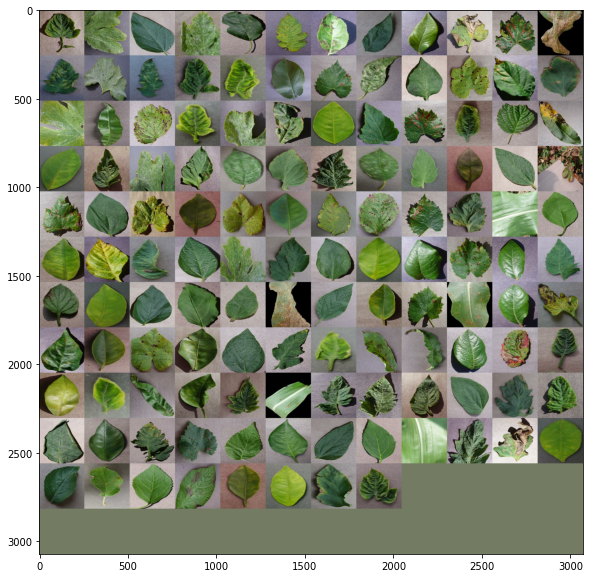

In [ ]:
plt.figure(figsize=(10,10))
for example in pp_train.take(1):  
  image, label = example[0], example[1]
  plt.imshow(montage(image, multichannel=True))

In [ ]:
model = tf.keras.models.Sequential([                                                              
  ### Flatten
  tf.keras.layers.Flatten(input_shape=(256,256,3)),
  ### Dense
  tf.keras.layers.Dense(512,activation='relu',name='layer1'),
  ### Dense
  tf.keras.layers.Dense(256,activation='relu',name='layer2'),
  ### Dense
  tf.keras.layers.Dense(128,activation='relu',name='layer3'),
  ### Dense softmax
  tf.keras.layers.Dense(38,activation='softmax',name='layer_output')

])

In [ ]:
model.compile(
    ### loss function sparse_categorical_crossentropy
    loss='sparse_categorical_crossentropy',
    ### Adam optimizer
    optimizer=tf.keras.optimizers.Adam(),
    ### metrics
    metrics=['sparse_categorical_accuracy','accuracy']
)

In [ ]:
history = model.fit(
    pp_train,
    batch_size=128,
    epochs=10,
    validation_data=pp_val
)

Epoch 1/10
340/340 [==============================] - 56s 160ms/step - loss: 10.0157 - sparse_categorical_accuracy: 0.2821 - accuracy: 0.2821 - val_loss: 2.3920 - val_sparse_categorical_accuracy: 0.3743 - val_accuracy: 0.3743
Epoch 2/10
340/340 [==============================] - 57s 165ms/step - loss: 2.0011 - sparse_categorical_accuracy: 0.4481 - accuracy: 0.4481 - val_loss: 1.9381 - val_sparse_categorical_accuracy: 0.4614 - val_accuracy: 0.4614
Epoch 3/10
340/340 [==============================] - 56s 162ms/step - loss: 1.6583 - sparse_categorical_accuracy: 0.5292 - accuracy: 0.5292 - val_loss: 1.7444 - val_sparse_categorical_accuracy: 0.5111 - val_accuracy: 0.5111
Epoch 4/10
340/340 [==============================] - 55s 159ms/step - loss: 1.4854 - sparse_categorical_accuracy: 0.5663 - accuracy: 0.5663 - val_loss: 1.4630 - val_sparse_categorical_accuracy: 0.5713 - val_accuracy: 0.5713
Epoch 5/10
340/340 [==============================] - 55s 161ms/step - loss: 1.3396 - sparse_catego

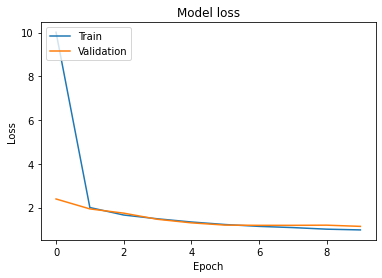

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 5s 111ms/step - loss: 1.1170 - sparse_categorical_accuracy: 0.6689 - accuracy: 0.6689
test loss, test acc: [1.1170493364334106, 0.668876588344574, 0.668876588344574]


In [ ]:
model_cnn = tf.keras.models.Sequential([
  ### Conv2D layer
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', input_shape=(256,256,3)),
  ### MaxPooling2D layer
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  ### Conv2D layer
   tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),
  ### MaxPooling2D layer
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  ### Flatten
  tf.keras.layers.Flatten(),
  ### Dense
  tf.keras.layers.Dense(64, activation='relu'),
  ### Dense softmax
  tf.keras.layers.Dense(38, activation='softmax')
])


In [ ]:
model_cnn.compile(
    ### loss function sparse_categorical_crossentropy
    loss='sparse_categorical_crossentropy',
    ### Adam optimizer
    optimizer=tf.keras.optimizers.Adam(),
    ### metrics
    metrics=['sparse_categorical_accuracy','accuracy']
)

In [ ]:
history_cnn = model_cnn.fit(
    pp_train,
    epochs=10,
    validation_data=pp_val,
)

Epoch 1/10
340/340 [==============================] - 187s 506ms/step - loss: 2.3863 - sparse_categorical_accuracy: 0.5502 - accuracy: 0.5502 - val_loss: 0.8436 - val_sparse_categorical_accuracy: 0.7500 - val_accuracy: 0.7500
Epoch 2/10
340/340 [==============================] - 170s 498ms/step - loss: 0.5652 - sparse_categorical_accuracy: 0.8303 - accuracy: 0.8303 - val_loss: 0.7499 - val_sparse_categorical_accuracy: 0.7776 - val_accuracy: 0.7776
Epoch 3/10
340/340 [==============================] - 170s 498ms/step - loss: 0.2518 - sparse_categorical_accuracy: 0.9222 - accuracy: 0.9222 - val_loss: 0.6939 - val_sparse_categorical_accuracy: 0.8251 - val_accuracy: 0.8251
Epoch 4/10
340/340 [==============================] - 169s 494ms/step - loss: 0.1323 - sparse_categorical_accuracy: 0.9589 - accuracy: 0.9589 - val_loss: 0.8268 - val_sparse_categorical_accuracy: 0.8043 - val_accuracy: 0.8043
Epoch 5/10
340/340 [==============================] - 169s 494ms/step - loss: 0.0806 - sparse_ca

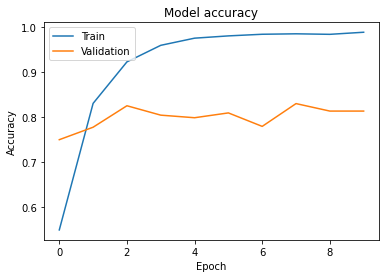

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

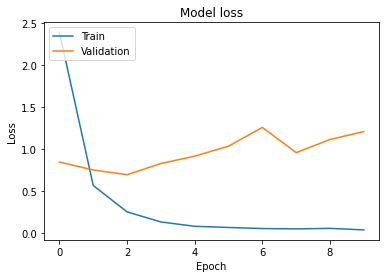

In [ ]:
# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model_cnn.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 11s 240ms/step - loss: 1.1723 - sparse_categorical_accuracy: 0.8129 - accuracy: 0.8129
test loss, test acc: [1.1722595691680908, 0.8128913640975952, 0.8128913640975952]
